<a href="https://www.kaggle.com/code/leonanvasconcelos/object-detection-with-pure-computer-vision?scriptVersionId=211373957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Requirements

**Scenario Description: Automated Fruit Detection and Analysis in Agricultural Imaging**
""**Objective:**  
Develop an automated system for detecting, counting, and analyzing round objects (such as fruitgs using advanced image processing and computer vision techniques. This system aims to enhance yield estimation, monitor crop health, and optimize harvesting processes by leveraging high-resolution images captured from various sources like drones or ground-based cameras.

**Workflow:**

1. **Image Acquisition:**
   - **Data Collection:** Utilize drones, satellite imagery, or fixed cameras to capture high-resolution images of orchards, plantations, or fruit-bearing areas. Ensure consistent lighting conditions and optimal angles to facilitate accurate detection.
   - **Image Input Options:** Support both direct image file paths (`path_image`) and Base64-encoded image strings (`image64`) to provide flexibility in data sourcing.

2. **Preprocessing:**
   - **Resizing:** Use `resize_image` to standardize image dimensions, ensuring uniformity across different datasets and optimizing processing speed without losing critical details.
   - **Aspect Ratio Adjustment:** Apply `crop_image_to_aspect_ratio` to maintain desired aspect ratios (e.g., 4:3 or 3:4) based on image orientation, enhancing the focus on relevant regions.

3. **Image Enhancement:**
   - **Contrast Enhancement:** Implement `apply_clahe` to improve image contrast adaptively, making fruits more distinguishable from the background.
   - **Color Smoothing:** Utilize `smooth_color` to reduce color noise and enhance the clarity of fruit regions, facilitating better segmentation.

4. **Color Filtering and Mask Generation:**
   - **Color Space Conversion:** Convert images to appropriate color spaces (HSV or LAB) using OpenCV's `cvtColor` for effective color-based segmentation.
   - **Color Range Selection:** Employ `filter_color` to isolate target fruits based on predefined color ranges, generating binary masks that highlight potential fruit regions.
   - **Morphological Operations:** Apply functions like `remove_salt_and_pepper`, `close_mask_circle`, and `expand_mask_circle` to refine masks by eliminating noise, closing gaps, and expanding regions to cover entire fruits.

5. **Foreground and Background Segmentation:**
   - **Foreground Masking:** Combine multiple masks using weighted summation to create a comprehensive foreground mask that accurately represents fruit regions.
   - **Background Masking:** Invert the foreground mask to delineate background areas, enabling separate processing if needed.

6. **Object Detection:**
   - **Circle Detection:** Utilize `detect_circles` with OpenCV's `SimpleBlobDetector` to identify circular shapes corresponding to fruits. Parameters like circularity, convexity, and inertia ratio are fine-tuned to enhance detection accuracy.
   - **Overlap Handling:** Implement `remove_overlapping_circles` to eliminate duplicate detections and ensure each fruit is counted only once.
   - **Visualization:** Use `draw_circles` to annotate detected fruits on the original image, providing visual confirmation and aiding in result verification.

7. **K-Means Clustering (Optional):**
   - **Color Quantization:** Apply `kmeans_recolor` to reduce the color palette of the image, simplifying color variations and potentially improving detection performance in complex backgrounds.
   - **Visualization:** Generate clustered images to analyze color distributions and adjust clustering parameters as needed.

8. **EXIF Metadata Extraction:**
   - **Metadata Retrieval:** Use `extract_metadata_EXIF` to obtain valuable information such as GPS coordinates, capture date, camera model, and manufacturer from image metadata.
   - **Data Integration:** Incorporate EXIF data into the final report for contextual insights, enabling spatial and temporal analysis of fruit distribution and growth patterns.

9. **Post-processing and Reporting:**
   - **Result Compilation:** Aggregate detection results, including the number of fruits detected and accuracy metrics, into a structured JSON format using `format_result`.
   - **Image Saving:** Save annotated images with detection overlays and preprocessed images for record-keeping and further analysis using `save_image`.
   - **Interactive Tuning (Debugging):** Provide functions like `tunning_blur`, `tunning_color`, and `tunning_BlobCircles` with OpenCV trackbars for real-time parameter adjustments, facilitating optimization during development and deployment.

10. **Batch Processing and Automation:**
    - **Batch Mode Support:** Enable processing of multiple images in a directory through the `test_directory` function, automating the detection pipeline and generating summarized accuracy reports.
    - **Error Handling:** Implement robust error handling to manage issues like invalid image paths, decoding errors, and missing EXIF data, ensuring the system's resilience and reliability.

**Benefits:**

- **Efficiency:** Automates the time-consuming process of fruit counting and analysis, allowing farmers and agricultural professionals to focus on decision-making and field operations.
- **Accuracy:** Enhances detection precision through advanced filtering, morphological operations, and customizable parameters, reducing human error and ensuring reliable yield estimates.
- **Scalability:** Capable of handling large datasets from extensive agricultural fields, supporting scalability as operations grow.
- **Flexibility:** Accommodates various image input formats and sources, providing versatility in data acquisition and integration.
- **Insightful Reporting:** Integrates EXIF metadata and detailed JSON reports, offering comprehensive insights into fruit distribution, environmental conditions, and system performance.
- **User-Friendly Tuning:** Interactive tuning functions enable users to adjust parameters on-the-fly, tailoring the system to specific agricultural contexts and improving adaptability to different fruit types and environments.
- **Cost-Effective:** Reduces the need for manual labor in fruit counting and monitoring, lowering operational costs and increasing overall productivity.

By implementing this comprehensive system, agricultural stakeholders can achieve enhanced monitoring of crop yields, better resource allocation, and informed strategies for crop management, ultimately contributing to increased agricultural efficiency and sustainability.

In [ ]:
# Requirements

from PIL import Image as PILImage
import os, random, io, base64, json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


#!jupyter nbextension install --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension enable @jupyter-widgets/jupyterlab-manager

import ipywidgets as widgets

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
`sys_prefix` level settings are read-only, using `user` level for migration to `lockedExtension

In [2]:
# Utils: functions created by the author

#!git clone https://github.com/LeonanUCM/ObjectDetectionPureCV.git
import config_profiles
import utils_cv
import main

# Test

In [3]:
# Detailed test:
config_profiles.set_batch_mode(True)
config_profiles.set_notebook_mode(True)
config_profiles.set_print_report_on_image(True)
config_profiles.set_debug_level(3)

accuracy_summaries = []
accuracy_summaries.append(main.test_directory(r"D:\IA\FruitCounting\ObjectDetectionPureCV\test_images", 'YELLOW_PEACH ', limit_files=1))

for summary in accuracy_summaries:
    print(summary)    

0it [00:00, ?it/s]                   

>>>>> Image: peach_yellow_102_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
Looking for previous analysis:
Deleting previous analysis: peach_yellow_102_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
Deleted previous analysis.
directory=D:\IA\FruitCounting\ObjectDetectionPureCV\test_images
No images found. Average Accuracy of YELLOW_PEACH : 0.0% out of 0 images
directory=D:\IA\FruitCounting\ObjectDetectionPureCV\test_images
No images found. Average Accuracy of YELLOW_PEACH : 0.0% out of 0 images


  0%|          | 0/19 [00:00<?, ?it/s]

>>>>> Image: peach_yellow_104_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
Looking for previous analysis:
Deleting previous analysis: peach_yellow_104_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
Deleted previous analysis.
>>>>> Image: peach_yellow_109_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_109_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 44.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:45', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:45', 36868: '2024:06:04 20:37:45', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 

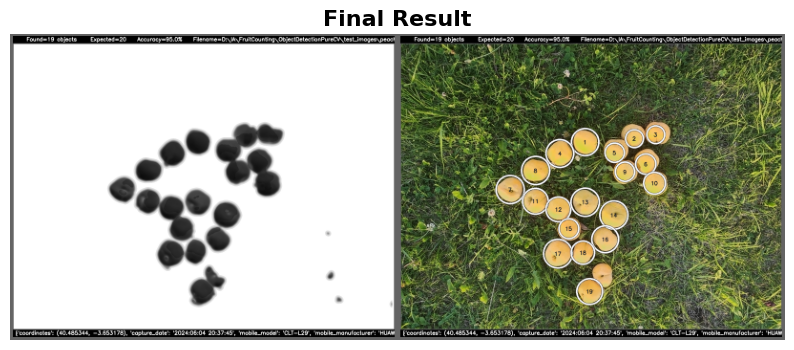

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_109_gt20.jpg_result_pd=[19]acc=[95.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 44.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:45', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:45', 36868: '2024:06:04 20:37:45', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '264271', 37521: '264271', 37522: '264271', 40963: 2736, 41996: 0, 41495: 2, 41728:

 11%|█         | 2/18 [00:01<00:11,  1.37it/s]

End of count_round_objects.

>>>>> Image: peach_yellow_100_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_100_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 4.230651), 3: 'W', 4: (3.0, 39.0, 14.949474), 5: b'\x00', 6: 736.2, 7: (18.0, 34.0, 52.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:34:53', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:34:53', 36868: '2024:06:04 20:34:53', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '762011', 37521: '762011', 37522: '762011', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.00829

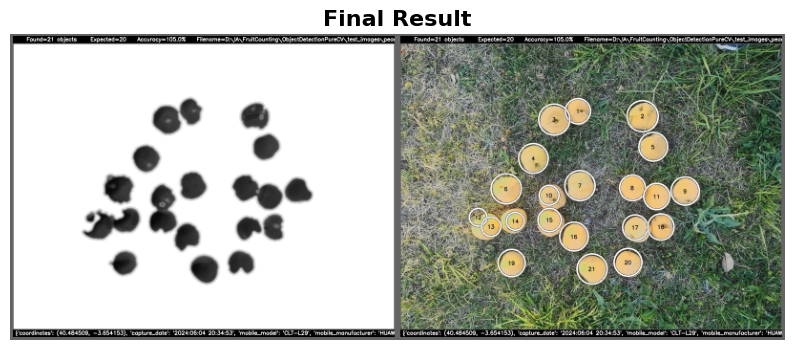

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_100_gt20.jpg_result_pd=[21]acc=[105.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 4.230651), 3: 'W', 4: (3.0, 39.0, 14.949474), 5: b'\x00', 6: 736.2, 7: (18.0, 34.0, 52.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:34:53', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:34:53', 36868: '2024:06:04 20:34:53', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '762011', 37521: '762011', 37522: '762011', 40963: 2736, 41996: 0, 41495: 2, 417

 17%|█▋        | 3/18 [00:02<00:14,  1.01it/s]

count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 26.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:27', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:27', 36868: '2024:06:04 20:57:27', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '883184', 37521: '883184', 37522: '883184', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.01, 40965: 8472, 33437: 1.8, 41729: b'\x01', 34850: 2, 41985: 1, 34855: 80, 41986: 0, 40960: b'0100', 41987: 0, 41988: 1.0, 41989: 27, 41990: 0, 419

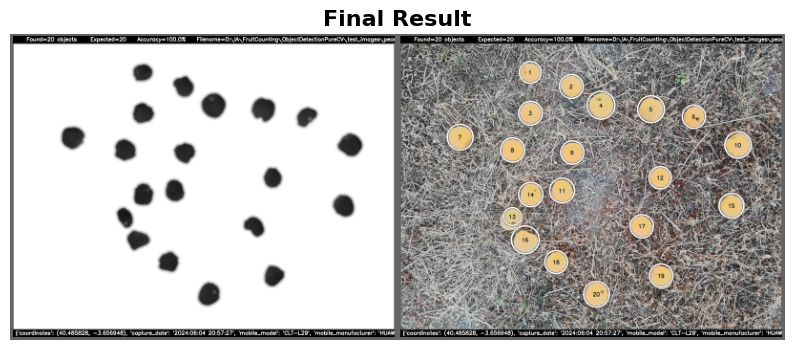

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_103_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 26.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:27', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:27', 36868: '2024:06:04 20:57:27', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '883184', 37521: '883184', 37522: '883184', 40963: 2736, 41996: 0, 41495: 2, 417

 22%|██▏       | 4/18 [00:04<00:15,  1.13s/it]

count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 35.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:36', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:36', 36868: '2024:06:04 20:37:36', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '044719', 37521: '044719', 37522: '044719', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.001111, 40965: 8484, 33437: 1.8, 41729: b'\x01', 34850: 2, 41985: 1, 34855: 320, 41986: 0, 40960: b'0100', 41987: 0, 41988: 1.0, 41989: 27, 41990: 0, 

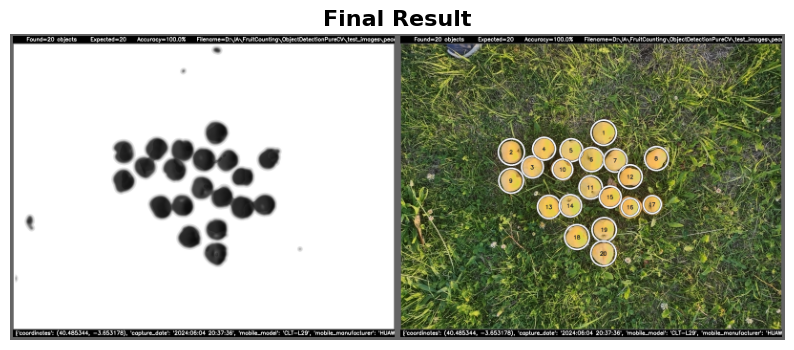

 29%|██▉       | 5/17 [00:05<00:14,  1.20s/it]

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_107_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 35.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:36', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:36', 36868: '2024:06:04 20:37:36', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '044719', 37521: '044719', 37522: '044719', 40963: 2736, 41996: 0, 41495: 2, 41728

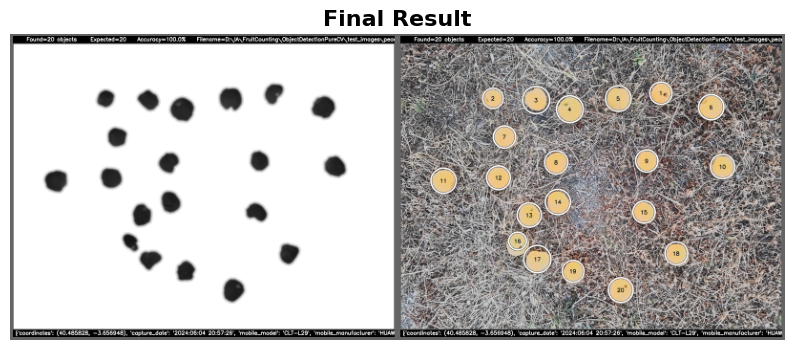

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_102_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 25.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:26', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:26', 36868: '2024:06:04 20:57:26', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '262716', 37521: '262716', 37522: '262716', 40963: 2736, 41996: 0, 41495: 2, 417

 35%|███▌      | 6/17 [00:06<00:13,  1.27s/it]


>>>>> Image: peach_yellow_101_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_101_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.735046), 3: 'W', 4: (3.0, 39.0, 20.138797), 5: b'\x00', 6: 744.2, 7: (18.0, 47.0, 57.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:47:58', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:47:58', 36868: '2024:06:04 20:47:58', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '631729', 37521: '631729', 37522: '631729', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.01, 40965: 8472, 33437: 1.8, 4172

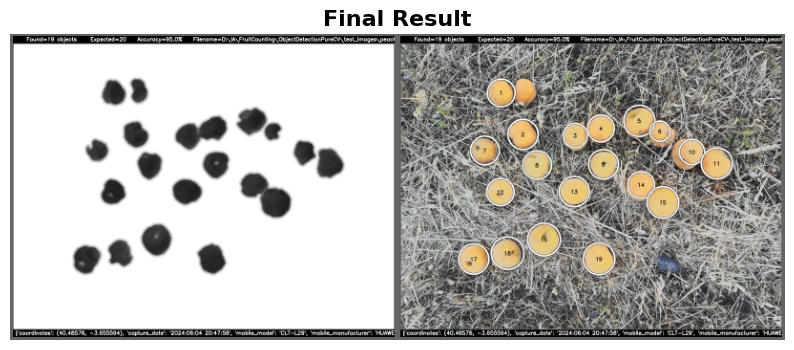

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_101_gt20.jpg_result_pd=[19]acc=[95.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.735046), 3: 'W', 4: (3.0, 39.0, 20.138797), 5: b'\x00', 6: 744.2, 7: (18.0, 47.0, 57.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:47:58', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:47:58', 36868: '2024:06:04 20:47:58', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '631729', 37521: '631729', 37522: '631729', 40963: 2736, 41996: 0, 41495: 2, 4172

 44%|████▍     | 7/16 [00:08<00:11,  1.31s/it]

Deleted previous analysis.
>>>>> Image: peach_yellow_105_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_105_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 36.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:37', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:37', 36868: '2024:06:04 20:57:37', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '500949', 37521: '500949', 37522: '500949', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.01, 409

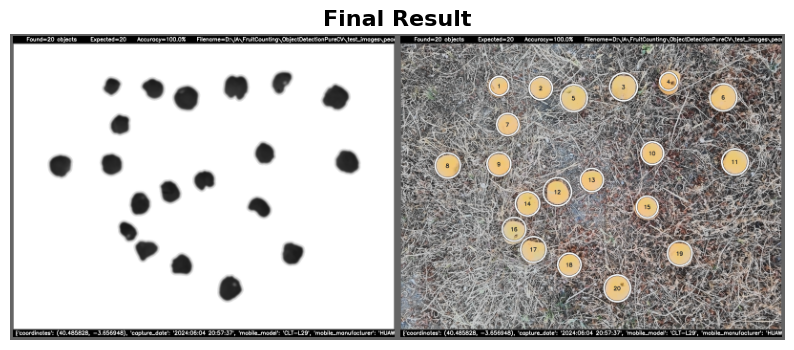

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_105_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 36.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:37', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:37', 36868: '2024:06:04 20:57:37', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '500949', 37521: '500949', 37522: '500949', 40963: 2736, 41996: 0, 41495: 2, 417

 53%|█████▎    | 8/15 [00:09<00:09,  1.31s/it]

Deleted previous analysis.
>>>>> Image: peach_yellow_108_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_108_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 39.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:40', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:40', 36868: '2024:06:04 20:37:40', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '606973', 37521: '606973', 37522: '606973', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.001111, 4

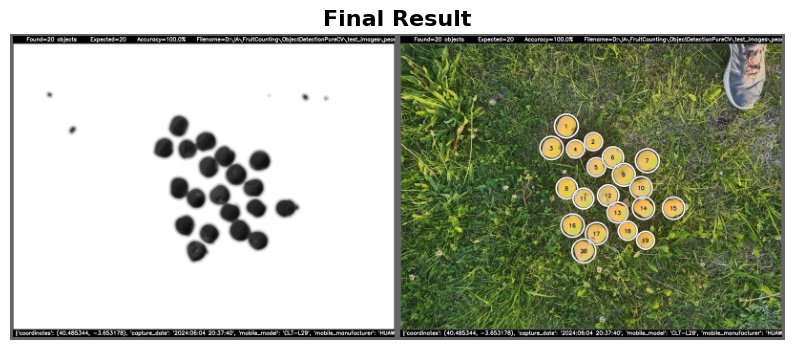

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_108_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 7.238159), 3: 'W', 4: (3.0, 39.0, 11.441574), 5: b'\x00', 6: 829.14, 7: (18.0, 37.0, 39.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:37:40', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:37:40', 36868: '2024:06:04 20:37:40', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '606973', 37521: '606973', 37522: '606973', 40963: 2736, 41996: 0, 41495: 2, 41728

 75%|███████▌  | 9/12 [00:11<00:04,  1.34s/it]

count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 3.94226), 3: 'W', 4: (3.0, 39.0, 14.953765), 5: b'\x00', 6: 829.14, 7: (18.0, 36.0, 57.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:36:57', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:36:57', 36868: '2024:06:04 20:36:57', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '944230', 37521: '944230', 37522: '944230', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.001111, 40965: 8484, 33437: 1.8, 41729: b'\x01', 34850: 2, 41985: 1, 34855: 250, 41986: 0, 40960: b'0100', 41987: 0, 41988: 1.0, 41989: 27, 41990: 0, 4

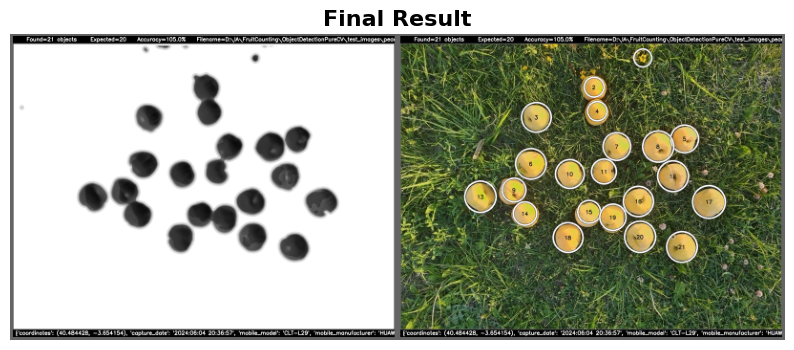

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_106_gt20.jpg_result_pd=[21]acc=[105.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 3.94226), 3: 'W', 4: (3.0, 39.0, 14.953765), 5: b'\x00', 6: 829.14, 7: (18.0, 36.0, 57.0), 27: 'GPS', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:36:57', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:36:57', 36868: '2024:06:04 20:36:57', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '944230', 37521: '944230', 37522: '944230', 40963: 2736, 41996: 0, 41495: 2, 41728:

 91%|█████████ | 10/11 [00:12<00:01,  1.37s/it]

Deleted previous analysis.
>>>>> Image: peach_yellow_104_gt20.jpg
Looking for previous analysis:
Processing image: peach_yellow_104_gt20.jpg
count_round_objects. version=2024/dec/05
  json_exif_str=
  json_gps_str=
Trying to load image
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 30.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:31', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:31', 36868: '2024:06:04 20:57:31', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '207395', 37521: '207395', 37522: '207395', 40963: 2736, 41996: 0, 41495: 2, 41728: b'\x03', 33434: 0.01, 409

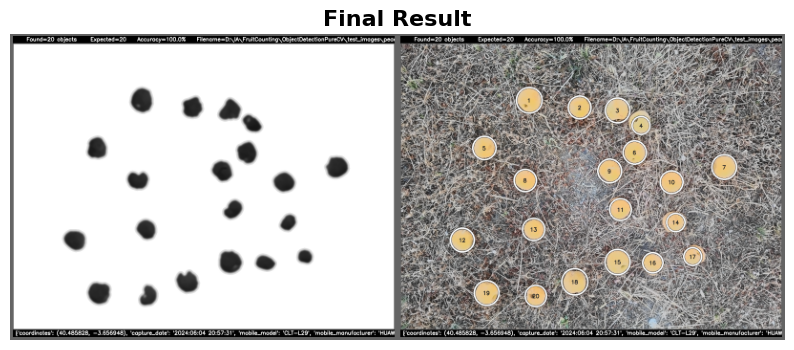

100%|██████████| 11/11 [00:13<00:00,  1.36s/it]

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_104_gt20.jpg_result_pd=[20]acc=[100.0pct].jpg
    Original Image Reduced: (2736, 3648, 3)    New Size: (1536, 2048, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 3648, 257: 2736, 258: (8, 8, 8), 34853: {0: b'\x02\x02\x00\x00', 1: 'N', 2: (40.0, 29.0, 8.982238), 3: 'W', 4: (3.0, 39.0, 25.011405), 5: b'\x00', 6: 745.2, 7: (18.0, 57.0, 30.0), 27: 'CELLID', 29: '2024:06:04'}, 296: 2, 34665: 284, 41995: b'ipp\x00', 271: 'HUAWEI', 272: 'CLT-L29', 305: 'CLT-L29 12.0.0.225(C432E5R1P1)', 274: 0, 306: '2024:06:04 20:57:31', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0210', 37121: b'\x01\x02\x03\x00', 37122: 0.95, 36867: '2024:06:04 20:57:31', 36868: '2024:06:04 20:57:31', 37377: 29.8973, 37378: 1.69, 37379: 0.0, 37380: 0.0, 37381: 1.69, 37383: 5, 37384: 1, 37385: 0, 37386: 5.58, 40961: 1, 40962: 3648, 37520: '207395', 37521: '207395', 37522: '207395', 40963: 2736, 41996: 0, 41495: 2, 417

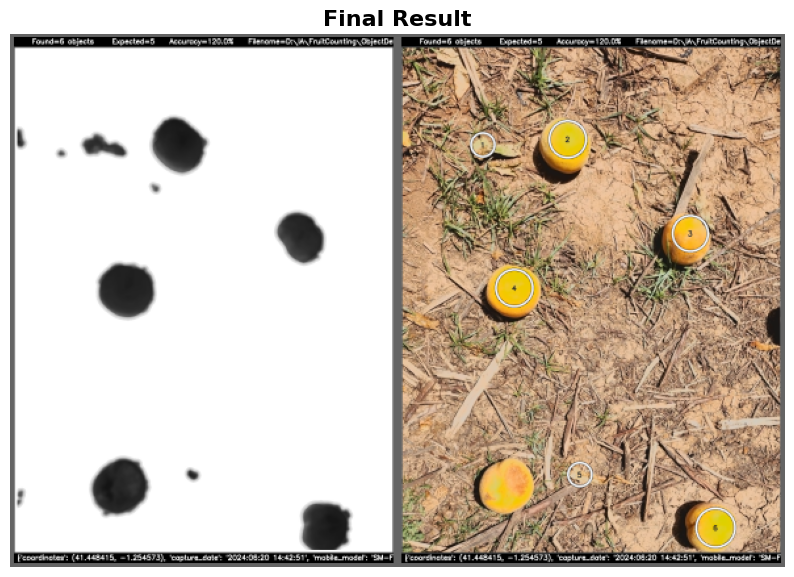

9. Saving files
    Saved: D:\IA\FruitCounting\ObjectDetectionPureCV\test_images\peach_yellow_110_gt5.jpg_result_pd=[6]acc=[120.0pct].jpg
    Original Image Reduced: (1500, 1126, 3)    New Size: (2048, 1537, 3)
Print configuration



10. Calculating Result JSON:
EXIF={256: 1126, 257: 1500, 34853: {1: 'N', 2: (41.0, 26.0, 54.29364), 3: 'W', 4: (1.0, 15.0, 16.46244), 5: 0, 6: 485.0}, 296: 2, 34665: 238, 271: 'samsung', 272: 'SM-F721B', 305: 'F721BXXS5EXBF', 274: 1, 306: '2024:06:20 14:42:51', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0220', 37377: 0.000286286859433152, 37378: 1.69, 36867: '2024:06:20 14:42:51', 36868: '2024:06:20 14:42:51', 37379: 9.66, 37380: 0.0, 37381: 1.69, 37383: 2, 37385: 0, 37386: 5.0, 40961: 1, 40962: 1126, 41988: 1.0, 41989: 24, 41990: 0, 36880: '+02:00', 36881: '+02:00', 37520: '456', 37521: '456', 37522: '456', 40963: 1500, 33434: 0.000286286859433152, 33437: 1.8, 42016: 'J10QLOL00MM', 34850: 2, 34855: 50, 41986: 0, 41987: 0}
End of count_round_objects.

director

100%|██████████| 11/11 [00:15<00:00,  1.38s/it]

directory=D:\IA\FruitCounting\ObjectDetectionPureCV\test_images
Average Error of YELLOW_PEACH : 3.6% out of 11 images


In [4]:
# Batch test:

config_profiles.set_batch_mode(True)
config_profiles.set_notebook_mode(True)
config_profiles.set_print_report_on_image(True)
config_profiles.set_debug_level(1)

accuracy_summaries = []
accuracy_summaries.append(main.test_directory(r"D:\IA\FruitCounting\ObjectDetectionPureCV\test_images", 'YELLOW_PEACH '))

for summary in accuracy_summaries:
    print(summary)        